In [21]:
 import pandas as pd
 import numpy as np

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')

In [3]:
dados.shape[1]

18

In [4]:
dados.drop(columns=['CUST_ID','TENURE'], inplace=True)

In [5]:
dados.shape[1]

16

In [6]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [7]:
# substituir dados nulos pela mediana
dados.fillna(dados.median(), inplace=True)
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [8]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [11]:
# validação clusteres atraves do coeficiente de silhoutte

from sklearn import metrics

In [12]:
# varia entre -1 e 1, quanto mais perto de 1 mais separados estão os clusters
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric ='euclidean')
silhouette

0.36443927743081506

In [13]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075878703157104

In [14]:
# quanto menor melhor
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.7825481721115

In [15]:
def clustering_algorithm(n_clusters, dados):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dados)
    s = metrics.silhouette_score(dados, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dados, labels)
    calinski = metrics.calinski_harabasz_score(dados, labels)
    return s, dbs, calinski
    

In [16]:
s1, dbs1, calinski1 = clustering_algorithm(3,values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088428 3526.440519908274


In [17]:
s2, dbs2, calinski2 = clustering_algorithm(5,values)
print(s2, dbs2, calinski2)

0.3644845919974304 1.075713859061329 3431.79374284143


In [20]:
s3, dbs3, calinski3 = clustering_algorithm(50,values)
print(s3, dbs3, calinski3)

0.240678440920941 1.2428633866703875 1609.4819025670079


In [22]:
dados.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [23]:

print(s, dbs, calinski)random_data = np.random.rand(890, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s2, dbs2, calinski2)

0.0456570668220321 3.3093029589852834 34.94407456185128
0.3644845919974304 1.075713859061329 3431.79374284143


In [24]:
# estabilidade do cluster
set1, set2,set3 = np.array_split(values,3)
s1, dbs1, calinski1 = clustering_algorithm(5,set1)
s2, dbs2, calinski2 = clustering_algorithm(5,set2)
s3, dbs3, calinski3 = clustering_algorithm(5,set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36871947128237154 1.056234682502021 1204.1115110650273
0.35416642754504835 1.1382306445993164 1194.951986504888
0.3670355256183801 1.09937675801675 1167.5313828364538


In [25]:
import matplotlib .pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

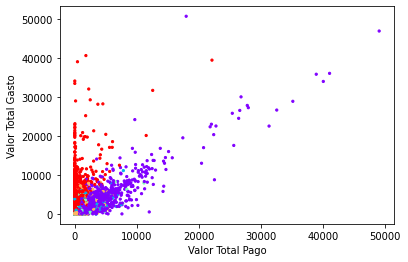

In [27]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor Total Pago')
plt.ylabel('Valor Total Gasto')
plt.show

In [28]:
import seaborn as sns

dados['cluster'] = labels


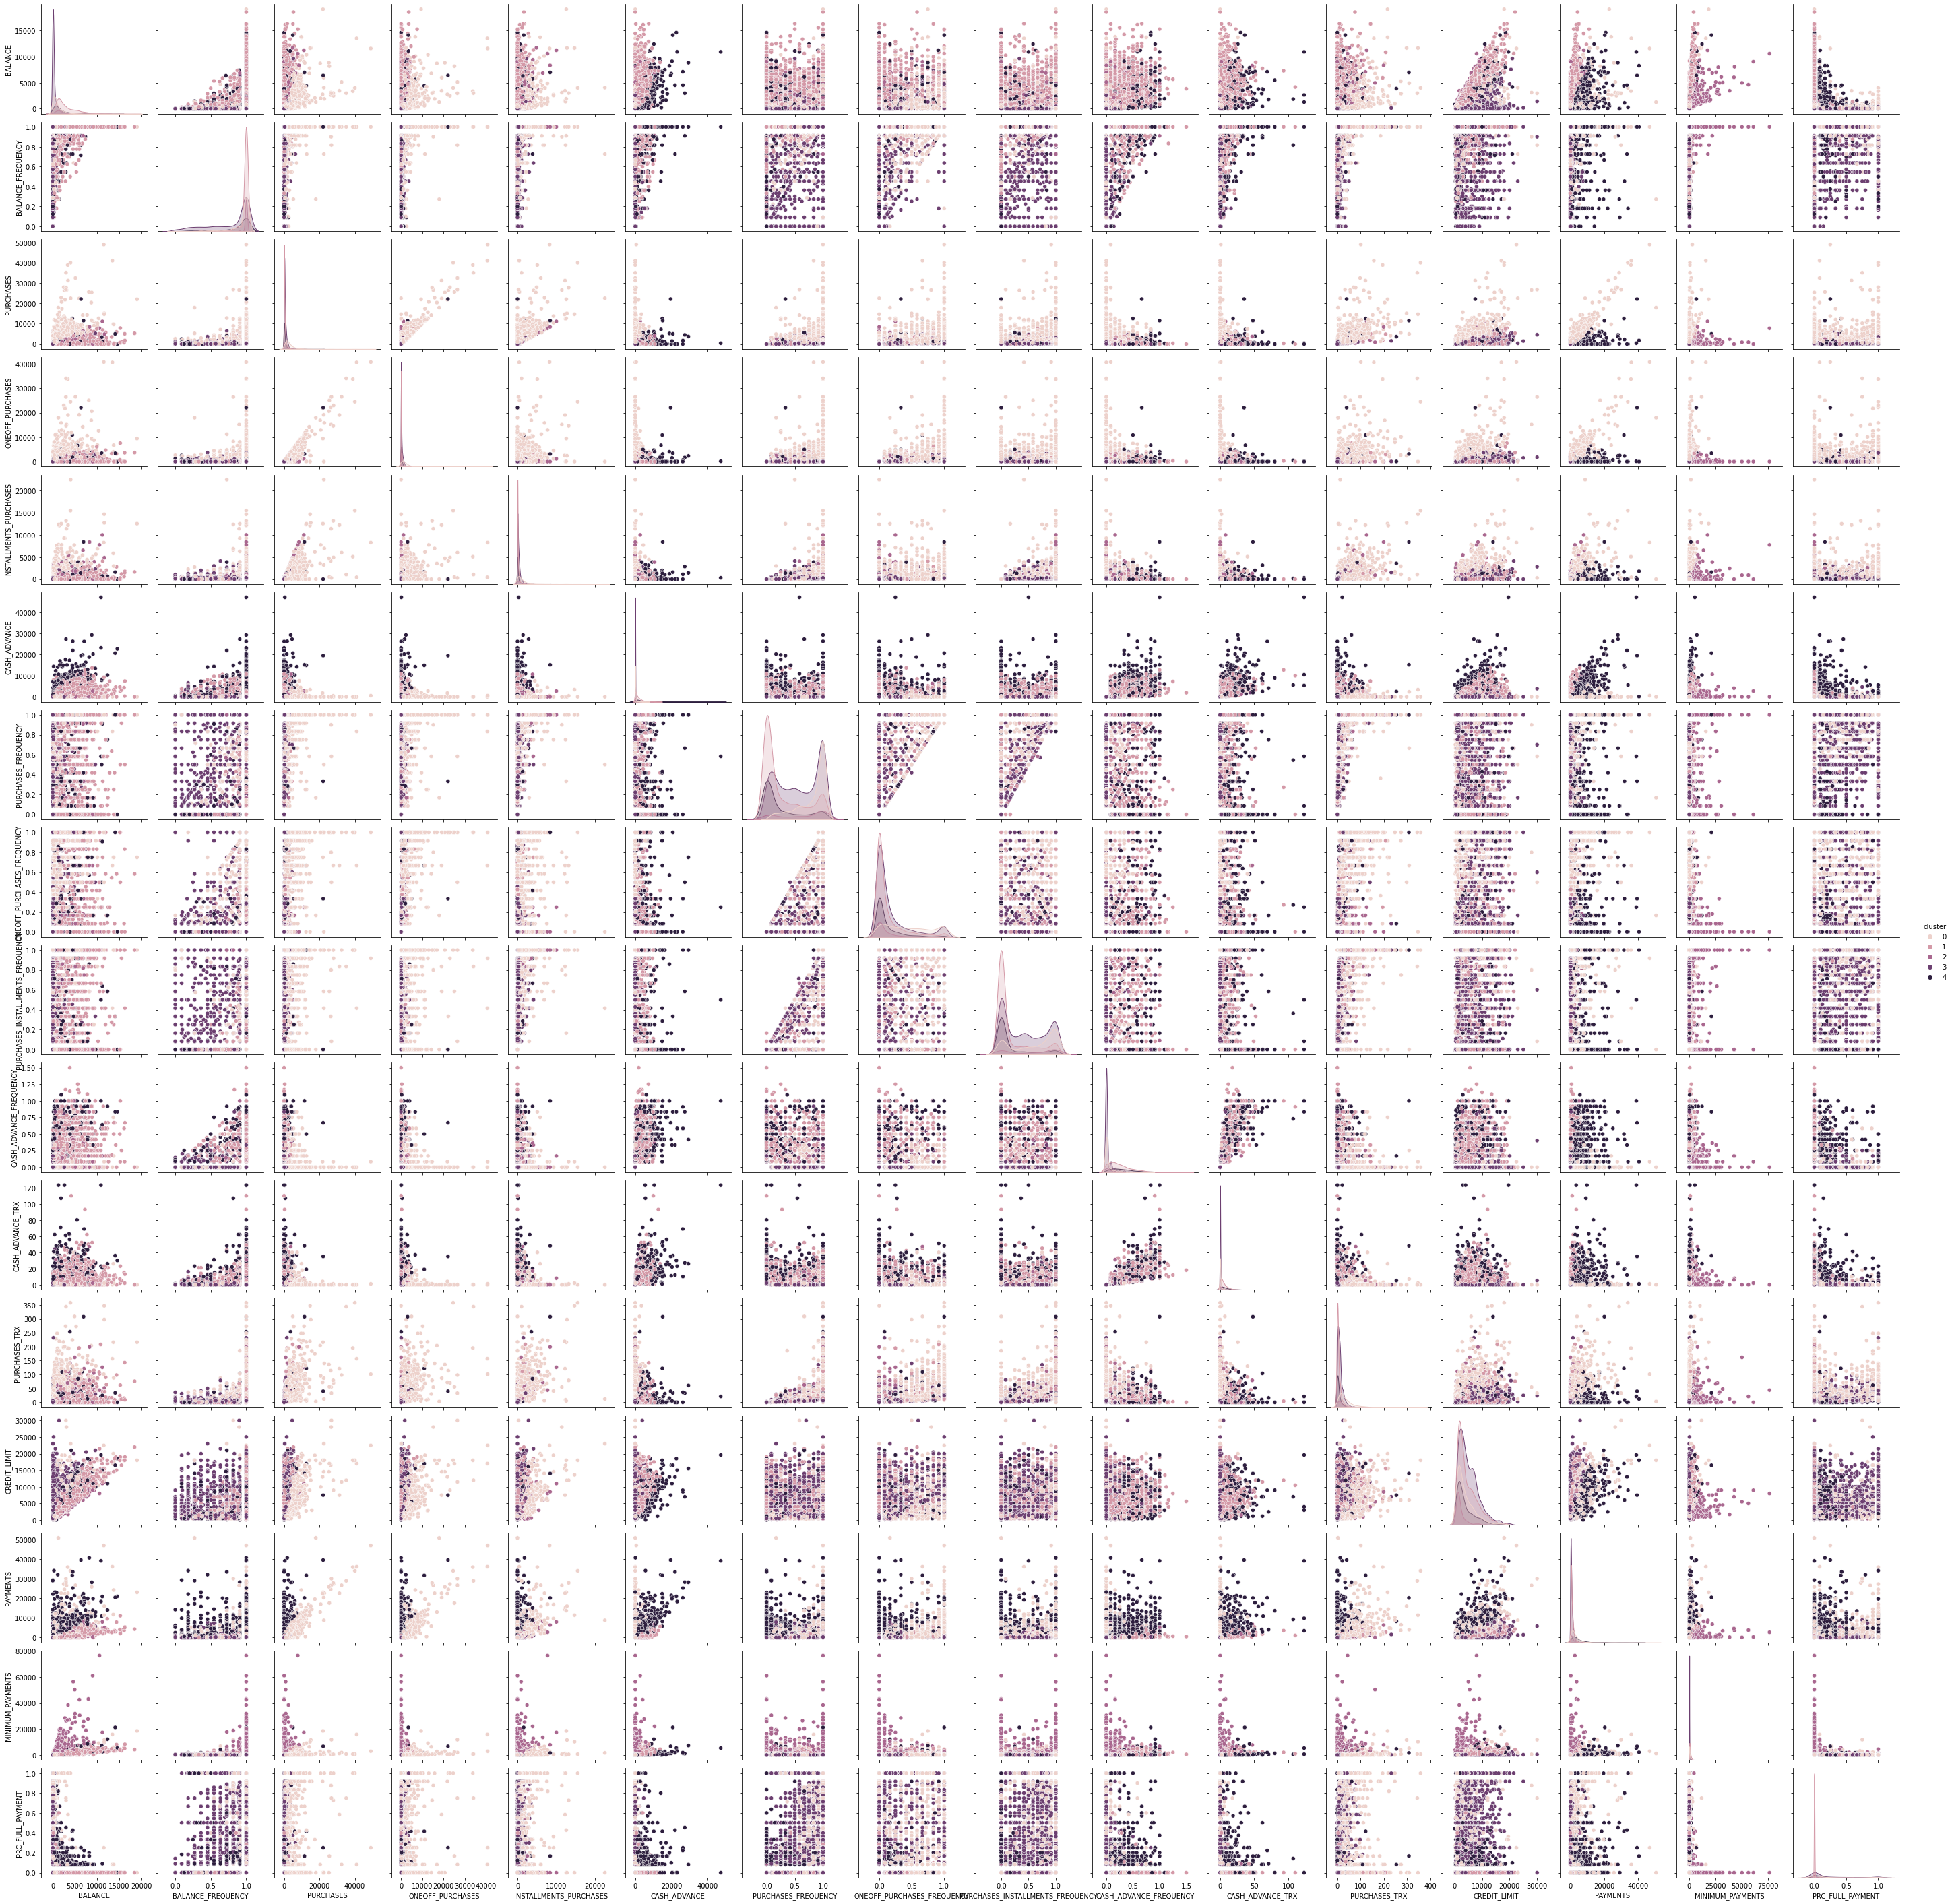

In [29]:
sns.pairplot(dados[0:], hue='cluster')

In [30]:
dados.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1541.0  1140.395363  1663.836536   0.000000   209.490297   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2         412.0  1987.146873  1852.215743  70.794108  1020.146724   
3        3276.0   444.212219   846.809334   0.000000    23.287145   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         552.464447  1369.969909  19043.138560            1541.0  0.928099   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1338.918346  2133.415063  11670.179850             412.0  0.989512   
3          82.992153   411.833075   9630.367575            3276.0  0.774280   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.422296  18621.013310           1541.0  0.279266   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...      7086.774783  76406.207520            412.0  0.019271   
3        ...       248.900782   4483.503862           3276.0  0.246293   
4        ...       884.718306  21235.065300           1072.0  0.117384   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367477  0.0  0.0  0.083333  0.545455  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.090795  0.0  0.0  0.000000  0.000000  1.0  
3        0.346454  0.0  0.0  0.000000  0.444444  1.0  
4        0.186853  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [31]:
centroids = kmeans.cluster_centers_
centroids

array([[1.59738813e-01, 2.45539530e-04, 4.37899142e-01, 2.56417561e-01,
        1.81652647e-01, 2.57868915e-02, 2.04724593e-04, 8.88180408e-05,
        1.51100049e-04, 9.36834144e-06, 1.69378578e-04, 6.17391999e-03,
        6.04768068e-01, 4.02440755e-01, 8.52026617e-02, 7.26174325e-05],
       [5.04289599e-01, 2.72275541e-04, 6.17031152e-02, 3.61472866e-02,
        2.55775500e-02, 2.52998524e-01, 6.73317111e-05, 2.56982515e-05,
        4.50750034e-05, 5.74605324e-05, 1.15731022e-03, 1.33218565e-03,
        7.19155598e-01, 1.66164956e-01, 1.79275871e-01, 5.52512128e-07],
       [3.32972556e-01, 2.68240066e-04, 1.58923673e-01, 3.62178588e-02,
        1.23089552e-01, 5.82140753e-02, 1.66817881e-04, 2.64295391e-05,
        1.47135264e-04, 1.92748591e-05, 4.26896159e-04, 3.86195702e-03,
        3.76646957e-01, 2.52402941e-01, 6.79571553e-01, 4.22964707e-06],
       [6.91172082e-02, 2.30558192e-04, 1.21221061e-01, 4.79941328e-02,
        7.33273099e-02, 2.43612925e-02, 1.72569863e-04, 3.368

In [37]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],'\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [38]:
BALANCE 
PURCHASES 
CASH_ADVANCE 
CREDIT_LIMIT 
PAYMENTS 

In [45]:
descripition = dados.groupby('cluster')['BALANCE', 'PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clients = descripition.size()
descripition = descripition.mean()
descripition['n_clients'] = n_clients
descripition


C:\Users\MUF366~1.SIM\AppData\Local\Temp/ipykernel_28508/302684748.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  descripition = dados.groupby('cluster')['BALANCE', 'PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']


BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1140.395363  3266.466710    182.900631   4096.794388  3034.900772   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
3         444.212219   629.173858    141.655729   5134.705973   814.396458   
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   

         n_clients  
cluster             
0             1541  
1             2649  
2              412  
3             3276  
4             1072

In [47]:
# CLUSTER 0: Clientes que gastam pouco. Melhores Pagadores.
# CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores Pagadores. Boa quantidade de clientes
# CLUSTER 2: Clientes que gastam muito com compras. Não são bons pagadores. Menor quantidade de clientes.
# CLUSTER 3: Clientes que gastam muito com saques. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
# CLUSTER 4: Clientes com o menor limite. Pagam as vezes. 

In [49]:
dados.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1541.0  0.279266  0.367477  0.0  0.0  0.083333  0.545455  1.0
1        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
2         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
3        3276.0  0.246293  0.346454  0.0  0.0  0.000000  0.444444  1.0
4        1072.0  0.117384  0.186853  0.0  0.0  0.083333  0.142857  1.0